# Data Augmentation for class identification in a Petrie box

In [28]:
import random
import numpy as np
from PIL import ImageFilter
from PIL import Image



In [65]:
def create_random_images(nb_images, name, image_size):

  list_of_images = []
  list_of_coco   = []

  #Creation of the blank starting image
  blank_image = np.zeros([image_size,image_size,3],dtype=np.uint8)
  blank_image.fill(255)
  blank_image = Image.fromarray(blank_image, mode="RGB")


  for i in range(nb_images):
    
    #setting up the random numbers of elements to include in the picture
    nb_hatched   = 43 #random.randint(20, 100)
    nb_unhatched = random.randint(20, 100)
    nb_worms     = random.randint(20, 100)
    image_name   = name+str(i)
    image        = blank_image.copy() 
    list_labels  = []
    
    for j in range(nb_hatched):
      image, label_dict = add_hatched(image, image_size, image_name)
      list_labels.append(label_dict)

    """for k in range(nb_unhatched):
      image, label_dict = add_unhatched(image, image_size, image_name)
      list_labels.append(label_dict)

    for l in range(nb_unhatched):
      image, label_dict = add_worms(image, image_size, image_name)
      list_labels.append(label_dict)"""
    
    list_of_coco.append(list_labels) 
    list_of_images.append(image)
  
  #coco_json = into_coco(list_of_coco)

  return list_of_images, list_of_coco#coco_json

In [34]:
def add_hatched(image, image_size, image_name):

  #standard value
  height  = 4 #FOR EXAMPLE
  width   = 5 #FOR EXAMPLE
  
  #the code below is just for an example. Otherwise fetch an image of Unhatched eggs and put it in the PIL Image format with height and with
  hatched = np.zeros([40,20,3],dtype=np.uint8)
  hatched.fill(0)
  hatched = Image.fromarray(hatched, mode="RGB")

  insertion_x = random.randint(0, image_size)
  insertion_y = random.randint(0, image_size)

  #Possible transformations:
  transfo = random.choice(["nothing", "alter", "reduce", "augment"])

  if transfo == "alter":
    #alter the quality 
    hatched.filter(ImageFilter.BLUR)
  
  if transfo == "reduce": 
    #randomly reduce the size (slightly for the eggs)
    height  = 3 #FOR EXAMPLE
    width   = 4
  
  if transfo == "augment": 
    #randomly augment the size (slightly for the eggs)
    height  = 5 #FOR EXAMPLE
    width   = 6

  """rotation = random.choice(["y", "n"])
  if rotation == "y":
     #rotate the element randomly, be careful to update the height and width otherwise problem with the bounding box"""
  
  #Insert the element in the image
  image.paste(hatched, (insertion_x,insertion_y))

  #Preparation of the bounding box
  point_a = (insertion_x - width/2, insertion_y + height/2)
  point_b = (insertion_x + width/2, insertion_y + height/2)
  point_c = (insertion_x + width/2, insertion_y - height/2)
  point_d = (insertion_x - width/2, insertion_y - height/2)

  #Bounding box dictionary
  label_dict = {
  "image_name": image_name,
  "class_name": "hatched",
  "point_a"   : point_a,
  "point_b"   : point_b,
  "point_c"   : point_c,
  "point_d"   : point_d
}

  return image, label_dict


In [68]:
im, dic = create_random_images(1, "testimage", 2000)

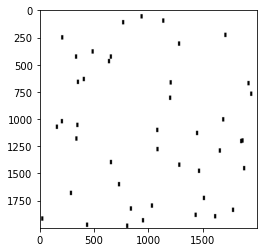

In [69]:
imshow(np.asarray(im[0]))

# [EXAMPLE] Paste an image

In [70]:
from PIL import Image
import numpy as np
a = np.full((1, 1), 255)
im = Image.fromarray(a, mode="RGB")
im.getpixel((0, 0))  # (44, 1, 0)

(255, 0, 0)

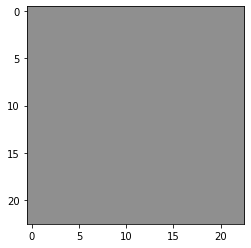

In [71]:
im = np.zeros([23,23,3],dtype=np.uint8)
im.fill(143)
im = Image.fromarray(im, mode="RGB")
imshow(np.asarray(im))

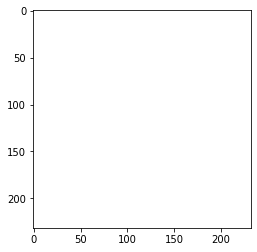

In [72]:
blank_image = np.zeros([232,232,3],dtype=np.uint8)
blank_image.fill(255)
im2 = Image.fromarray(blank_image, mode="RGB")
imshow(np.asarray(im2))

In [73]:
im2.paste(im, (0,0))

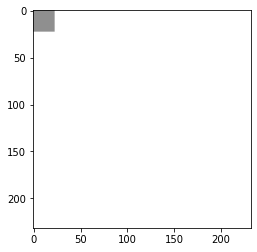

In [74]:
imshow(np.asarray(im2))

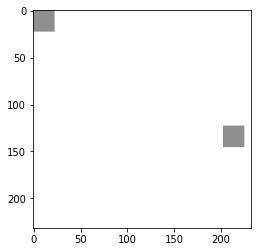

In [75]:
im2.paste(im, (202,123))
imshow(np.asarray(im2))